In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load Fetal Health Data
fetal_health=pd.read_csv('fetal_health.csv')

In [4]:
fetal_health.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


In [5]:
X = fetal_health.drop('fetal_health', axis=1)
y = fetal_health['fetal_health']

In [6]:
# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [23]:
# I will use 'SMOTE' to figure out this situation. the SMOTE module provides the Synthetic Minority Over-sampling Technique (SMOTE) algorithm for generating synthetic samples of the minority class in an imbalanced dataset.
from imblearn.over_sampling import SMOTE

In [25]:
# use 'SMOTE' modify x and y
# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:')
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

print('Class distribution after resampling:')
unique, counts = np.unique(y_train_res, return_counts=True)
print(dict(zip(unique, counts)))

Class distribution before resampling:
{0: 1322, 1: 231, 2: 147}
Class distribution after resampling:
{0: 1322, 1: 1322, 2: 1322}


In [26]:
# Standardizing the data (scaling)
from sklearn.preprocessing import StandardScaler

In [28]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Creating the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes

In [30]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train_res, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
124/124 [==============================] - 1s 9ms/step - loss: 0.8477 - accuracy: 0.6233
Epoch 2/50
124/124 [==============================] - 1s 8ms/step - loss: 0.5308 - accuracy: 0.8069
Epoch 3/50
124/124 [==============================] - 1s 7ms/step - loss: 0.4192 - accuracy: 0.8497
Epoch 4/50
124/124 [==============================] - 1s 7ms/step - loss: 0.3625 - accuracy: 0.8606
Epoch 5/50
124/124 [==============================] - 1s 8ms/step - loss: 0.3283 - accuracy: 0.8742
Epoch 6/50
124/124 [==============================] - 1s 8ms/step - loss: 0.3109 - accuracy: 0.8835
Epoch 7/50
124/124 [==============================] - 1s 7ms/step - loss: 0.2749 - accuracy: 0.8994
Epoch 8/50
124/124 [==============================] - 1s 8ms/step - loss: 0.2685 - accuracy: 0.9034
Epoch 9/50
124/124 [==============================] - 1s 7ms/step - loss: 0.2498 - accuracy: 0.9037
Epoch 10/50
124/124 [==============================] - 1s 7ms/step - loss: 0.2443 - accuracy: 0.9105

In [32]:
# Evaluating the model
train_loss, train_acc = model.evaluate(X_train_scaled, y_train_res, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Training accuracy: {train_acc}')
print(f'Test accuracy: {test_acc}')

Training accuracy: 0.9677256941795349
Test accuracy: 0.908450722694397


## The deep learning model gives us the highest model accuracy. Next, we will try to change a deep learning model.

In [33]:
from tensorflow.keras.layers import BatchNormalization

# Creating a deeper model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))  # 3 output classes

In [34]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train_res, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
124/124 [==============================] - 4s 23ms/step - loss: 1.1211 - accuracy: 0.5280
Epoch 2/100
124/124 [==============================] - 2s 20ms/step - loss: 0.7028 - accuracy: 0.7088
Epoch 3/100
124/124 [==============================] - 2s 19ms/step - loss: 0.5692 - accuracy: 0.7887
Epoch 4/100
124/124 [==============================] - 2s 19ms/step - loss: 0.4845 - accuracy: 0.8217
Epoch 5/100
124/124 [==============================] - 2s 19ms/step - loss: 0.4316 - accuracy: 0.8462
Epoch 6/100
124/124 [==============================] - 2s 19ms/step - loss: 0.3968 - accuracy: 0.8591
Epoch 7/100
124/124 [==============================] - 2s 18ms/step - loss: 0.3860 - accuracy: 0.8598
Epoch 8/100
124/124 [==============================] - 2s 19ms/step - loss: 0.3662 - accuracy: 0.8714
Epoch 9/100
124/124 [==============================] - 2s 18ms/step - loss: 0.3530 - accuracy: 0.8727
Epoch 10/100
124/124 [==============================] - 2s 18ms/step - loss: 0.329

In [35]:
# Evaluating the model
train_loss, train_acc = model.evaluate(X_train_scaled, y_train_res, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Training accuracy: {train_acc}')
print(f'Test accuracy: {test_acc}')

Training accuracy: 0.9798285365104675
Test accuracy: 0.9178403615951538


## EDA

In [36]:
# LOAD Packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [37]:
# Predicting on the test dataset
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)


14/14 [==============================] - 0s 8ms/step


In [38]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [39]:
cm

array([[307,  25,   1],
       [  5,  57,   2],
       [  0,   2,  27]])

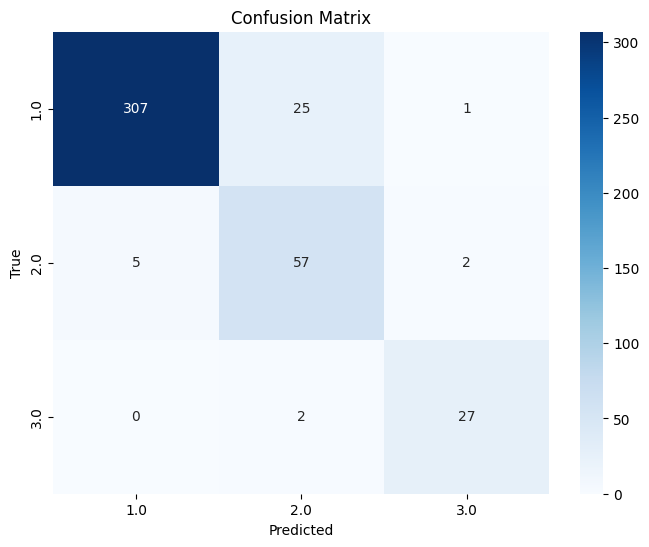

In [40]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

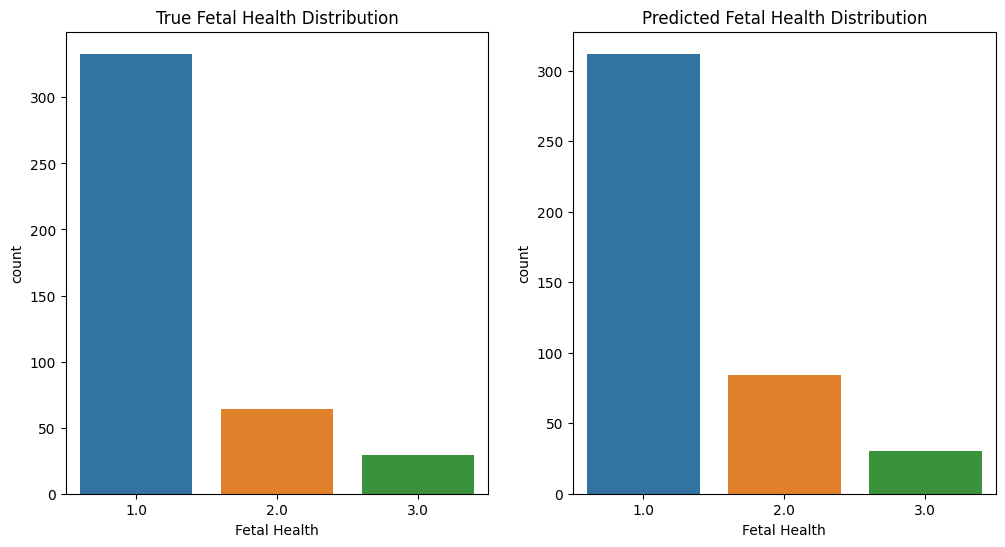

In [42]:
# Compare the distributions of predicted and actual values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_test)
plt.title('True Fetal Health Distribution')
plt.xlabel('Fetal Health')
plt.xticks(ticks=range(3), labels=encoder.classes_)

plt.subplot(1, 2, 2)
sns.countplot(x=y_pred)
plt.title('Predicted Fetal Health Distribution')
plt.xlabel('Fetal Health')
plt.xticks(ticks=range(3), labels=encoder.classes_)

plt.show()


## To improve the complexity of the deep learning model, but the accuracy of the improvement is not very high, I think the model has been quite good.